# Pre-requisite

- Create the analysis environment using the `conda` and the shared `environment.txt` file
- Use the following command for the same 



```
conda create -n new analysis --file environment.txt
```


### Importing libraries for the analysis


In [3]:

import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns   
from scipy import stats
%matplotlib inline 



### Reading in the data from the `application_data.csv` source


In [4]:
application_data=pd.read_csv("../data/raw/application_data.csv")
application_data.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### The shape of `application_data` csv

In [4]:
application_data.shape

(307511, 122)

#### The columns in the `application_data` csv


In [5]:
application_data.columns.values


array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',



#### General `info()` of the `application_data`



In [6]:
application_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


#### Using the `describe()` on the `application_data` to get a general sense of numerical columns


In [5]:
application_data.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000



# Data cleaning and manipulation


#### Feature Distribution

In [13]:
def type_features(data):
    categorical_features = data.select_dtypes(include = ["object"]).columns
    numerical_features = data.select_dtypes(exclude = ["object"]).columns
    print( "categorical_features :",categorical_features)
    print("numerical_features:",numerical_features)
    

#### Categorical and Numerical features in `application_data.csv`

In [14]:
type_features(application_data)

categorical_features : Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
numerical_features: Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)



# Data Imbalance wrt `TARGET` variable

Only 91.9% of the total customer are repaying the loan. We need to get better insights from the data and see which categories of the customer are not able to pay back loan.

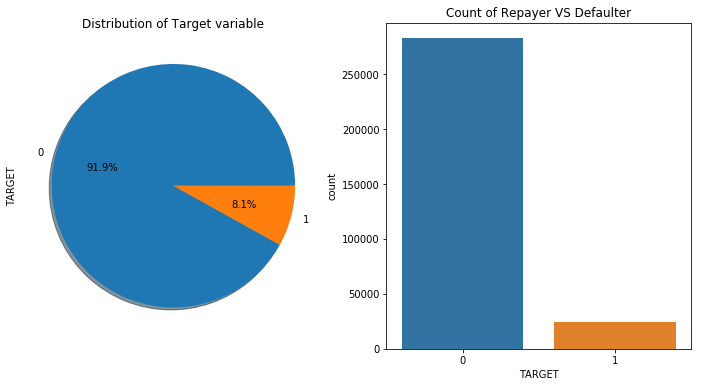

In [16]:
f,ax=plt.subplots(1,2,figsize=(12,6))
application_data.TARGET.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distribution of Target variable')
sns.countplot('TARGET',data=application_data,ax=ax[1])
ax[1].set_title('Count of Repayer VS Defaulter')
plt.show()

In [7]:
# function to analys missing values in a dataset

def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 40]
    f,ax =plt.subplots(figsize=(15,10))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by Cloumns>40%', fontsize=15)
    return ms


### Missing Value analysis for `application_data.csv`
Here in the plots it is showing columns which have more than 40% null/missing values in the dataset

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


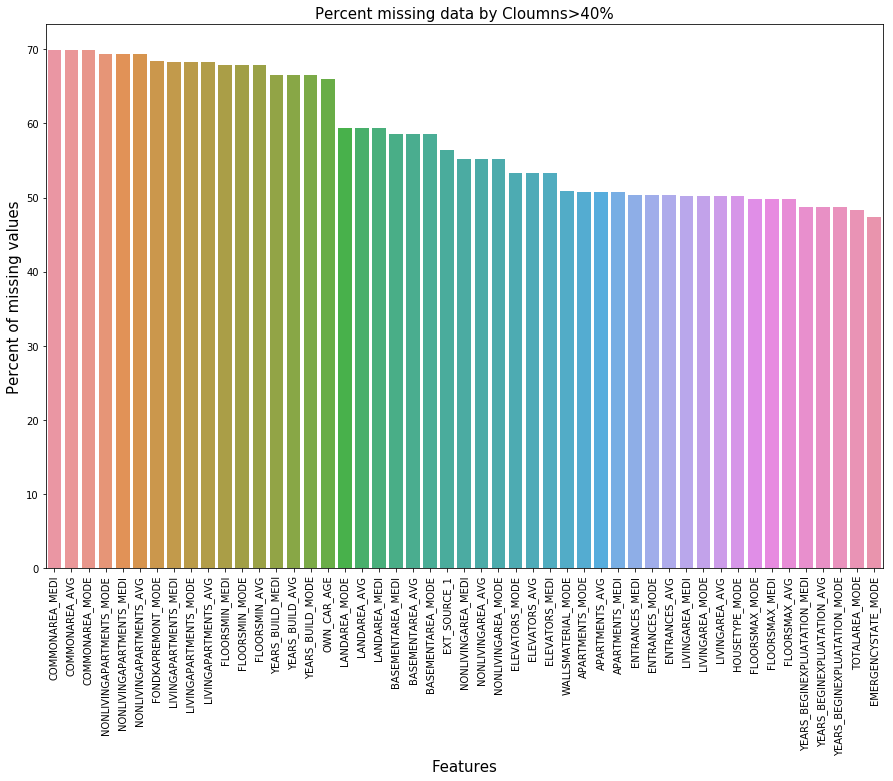

In [18]:
missingdata(application_data)



# Outlier Removal - IQR method


## `application_data.csv`



#### Doing the IQR analysis to find the outliers in the dataset


In [5]:

application_data_numerical_values = application_data[application_data.select_dtypes(exclude = ["object"]).columns]
application_data_numerical_values.drop(['SK_ID_CURR'], axis=1, inplace=True)
application_data_numerical_values.head()


/Users/eklavya/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0



#### First quantile


In [7]:
Q1 = application_data_numerical_values.quantile(0.25)
Q1



TARGET                              0.000000
CNT_CHILDREN                        0.000000
AMT_INCOME_TOTAL               112500.000000
AMT_CREDIT                     270000.000000
AMT_ANNUITY                     16524.000000
AMT_GOODS_PRICE                238500.000000
REGION_POPULATION_RELATIVE          0.010006
DAYS_BIRTH                     -19682.000000
DAYS_EMPLOYED                   -2760.000000
DAYS_REGISTRATION               -7479.500000
DAYS_ID_PUBLISH                 -4299.000000
OWN_CAR_AGE                         5.000000
FLAG_MOBIL                          1.000000
FLAG_EMP_PHONE                      1.000000
FLAG_WORK_PHONE                     0.000000
FLAG_CONT_MOBILE                    1.000000
FLAG_PHONE                          0.000000
FLAG_EMAIL                          0.000000
CNT_FAM_MEMBERS                     2.000000
REGION_RATING_CLIENT                2.000000
REGION_RATING_CLIENT_W_CITY         2.000000
HOUR_APPR_PROCESS_START            10.000000
REG_REGION


#### Third quantile


In [8]:
Q3 = application_data_numerical_values.quantile(0.75)
Q3

TARGET                              0.000000
CNT_CHILDREN                        1.000000
AMT_INCOME_TOTAL               202500.000000
AMT_CREDIT                     808650.000000
AMT_ANNUITY                     34596.000000
AMT_GOODS_PRICE                679500.000000
REGION_POPULATION_RELATIVE          0.028663
DAYS_BIRTH                     -12413.000000
DAYS_EMPLOYED                    -289.000000
DAYS_REGISTRATION               -2010.000000
DAYS_ID_PUBLISH                 -1720.000000
OWN_CAR_AGE                        15.000000
FLAG_MOBIL                          1.000000
FLAG_EMP_PHONE                      1.000000
FLAG_WORK_PHONE                     0.000000
FLAG_CONT_MOBILE                    1.000000
FLAG_PHONE                          1.000000
FLAG_EMAIL                          0.000000
CNT_FAM_MEMBERS                     3.000000
REGION_RATING_CLIENT                2.000000
REGION_RATING_CLIENT_W_CITY         2.000000
HOUR_APPR_PROCESS_START            14.000000
REG_REGION


#### Interquantile Range (IQR) in the `application_data.csv`


In [9]:
IQR = Q3 - Q1
IQR


TARGET                              0.000000
CNT_CHILDREN                        1.000000
AMT_INCOME_TOTAL                90000.000000
AMT_CREDIT                     538650.000000
AMT_ANNUITY                     18072.000000
AMT_GOODS_PRICE                441000.000000
REGION_POPULATION_RELATIVE          0.018657
DAYS_BIRTH                       7269.000000
DAYS_EMPLOYED                    2471.000000
DAYS_REGISTRATION                5469.500000
DAYS_ID_PUBLISH                  2579.000000
OWN_CAR_AGE                        10.000000
FLAG_MOBIL                          0.000000
FLAG_EMP_PHONE                      0.000000
FLAG_WORK_PHONE                     0.000000
FLAG_CONT_MOBILE                    0.000000
FLAG_PHONE                          1.000000
FLAG_EMAIL                          0.000000
CNT_FAM_MEMBERS                     1.000000
REGION_RATING_CLIENT                0.000000
REGION_RATING_CLIENT_W_CITY         0.000000
HOUR_APPR_PROCESS_START             4.000000
REG_REGION

In [10]:
z=(application_data_numerical_values < (Q1 - 1.5 * IQR)) | (application_data_numerical_values > (Q3 + 1.5 * IQR))
z.head()


,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Normalizing the `application_data.csv` using the `Quantile` ranges via `IQR` method


In [11]:

application_data_normalized = application_data_numerical_values[~((application_data_numerical_values < (Q1 - 1.5 * IQR)) |(application_data_numerical_values > (Q3 + 1.5 * IQR))).any(axis=1)]
application_data_normalized.head()


,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,0,0,135000.0,405000.0,20250.0,405000.0,0.019689,-14469,-2019,-14437.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
13,0,1,225000.0,918468.0,28966.5,697500.0,0.016612,-14086,-3028,-643.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
20,0,0,135000.0,427500.0,21375.0,427500.0,0.015221,-18252,-4286,-298.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
25,0,0,90000.0,225000.0,11074.5,225000.0,0.028663,-19334,-3494,-2419.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Shape of the normalized `application_data.csv`


In [12]:
application_data_normalized.shape



(26808, 105)


# Univariate analysis

### `application_data.csv`



#### Now we see the distribution of `numerical features`


#### Doing an analysis on the `DAYS_BIRTH` variable

Now we need to segragate the age into groups of 

- 20-30
- 30-40
- 40-50
- 50-60


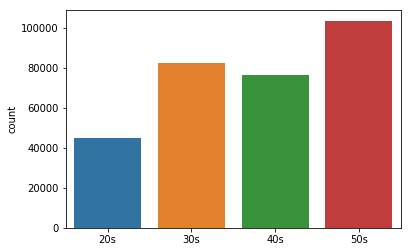

In [84]:
def classify_age(age):
    if (20<=age<30):
        return "20s"
    elif (30<=age<40):
        return "30s"
    elif (40<= age<50):
        return "40s"
    else:
        return "50s"
 
application_data['AGE'] = (application_data['DAYS_BIRTH'] / -365)

application_data['AGE_GROUP'] = application_data['AGE'].apply(lambda x: classify_age(x))

sns.countplot(sorted(application_data['AGE_GROUP']))



#### Similarly we shall now try to analyze the 4 numerical features 

- `AMT_ANNUITY`
- `AMT_CREDIT`
- `AMT_GOODS_PRICE`
- `AMT_INCOME_TOTAL`


Text(0.5, 1.0, 'customer Amount Annual income Distribution')

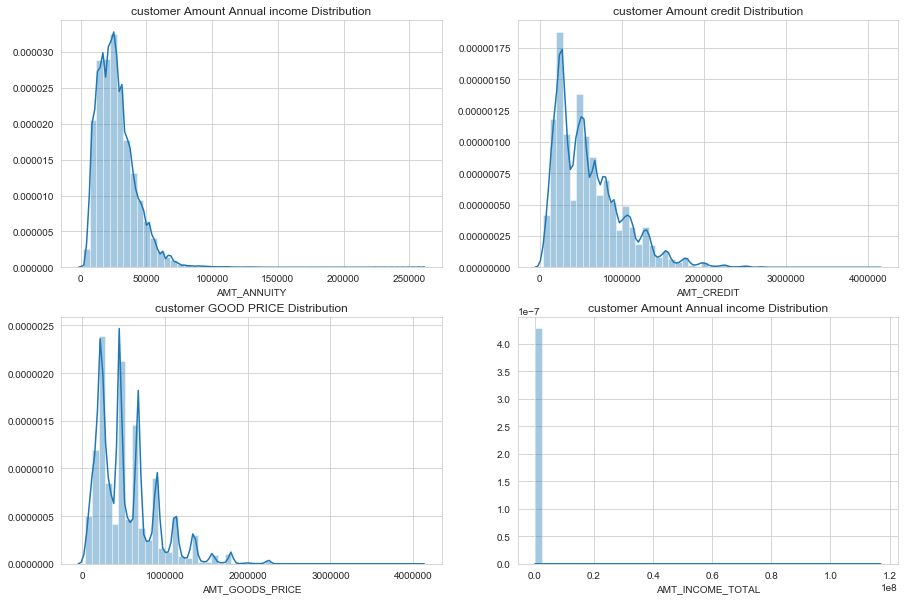

In [53]:
f, ax = plt.subplots(2,2, figsize=(15, 10))
sns.distplot(application_data.AMT_ANNUITY.dropna(), kde=True, ax=ax[0,0]).set_title('customer Amount Annual income Distribution')
sns.distplot(application_data.AMT_CREDIT.dropna(), kde=True, ax=ax[0,1]).set_title('customer Amount credit Distribution')
sns.distplot(application_data.AMT_GOODS_PRICE.dropna(), kde=True, ax=ax[1,0]).set_title('customer GOOD PRICE Distribution')
sns.distplot(application_data.AMT_INCOME_TOTAL.dropna(), kde=True, ax=ax[1,1]).set_title('customer Amount Annual income Distribution')


#### Next we try to see how many of our applicants have children using the `CNT_CHILDREN` variable

Text(0.5, 0, 'CNT_CHILDREN')

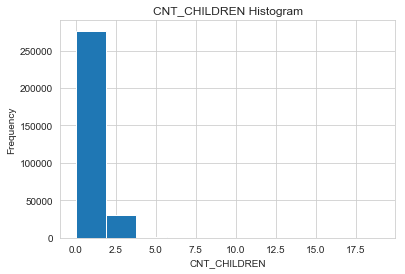

In [54]:
application_data['CNT_CHILDREN'].plot.hist(title = 'CNT_CHILDREN Histogram');
plt.xlabel('CNT_CHILDREN')


#### Our next step in this EDA is to identify whether the social circle has a correlation with hte Target at all.

For this we rely upon `REGION_POPULATION_RELATIVE`

Text(0.5, 0, 'REGION_POPULATION_RELATIVE')

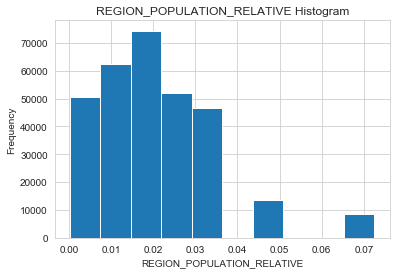

In [56]:
application_data['REGION_POPULATION_RELATIVE'].plot.hist(title = 'REGION_POPULATION_RELATIVE Histogram');
plt.xlabel('REGION_POPULATION_RELATIVE')



#### Let's review the correlation matrix for the variables examined so far:


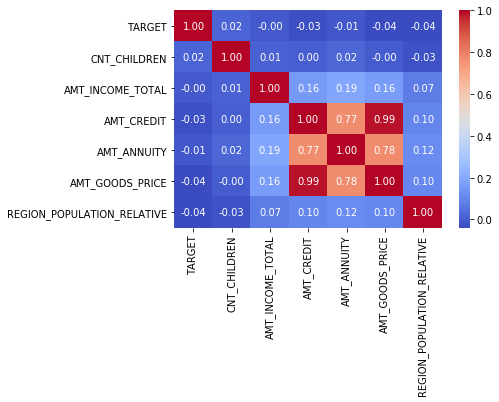

In [8]:
g = sns.heatmap(application_data[['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")



#### Clearly, none of the above variables are significantly correlated with `TARGET`. However, `AMT_CREDIT`, `AMT_ANNUITY`, and `AMT_GOODS_PRICE` are all highly correlated with each other,especially `AMT_CREDIT` and `AMT_GOODS_PRICE`




#### Further onwards, let's examine the `Professional` aspects of the applicant's data.

`DAYS_EMPLOYED`


In [61]:
(application_data['DAYS_EMPLOYED']).describe()


count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


#### The `DAYS_EMPLOYED` variable appears to be equal to (date of employment) minus (date of application), which is producing negative numbers. Thus we transform into positive numbers and into years (by dividing by -365.25) we get the following


In [62]:
(application_data['DAYS_EMPLOYED'] / -365.25).describe()


count    307511.000000
mean       -174.716074
std         386.791969
min        -999.980835
25%           0.791239
50%           3.321013
75%           7.556468
max          49.040383
Name: DAYS_EMPLOYED, dtype: float64


#### Clearly, in the `DAYS_EMPLOYED` feature, a maximum value being approximately 1000 years - which signifies incorrectness in the data.
We should also look at the other side of the distribution - 49 years of employment is a long time


Text(0.5, 0, 'DAYS_EMPLOYED')

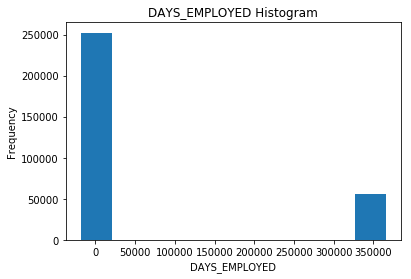

In [3]:
application_data['DAYS_EMPLOYED'].plot.hist(title = 'DAYS_EMPLOYED Histogram');
plt.xlabel('DAYS_EMPLOYED')



#### Here the ouliers are there so we have to be careful



#### Similar to the `DAYS_EMPLOYED`, This variable appears to be equal to (date of registration) minus (date of application), which is producing negative numbers, if we look again at the data transformed into positive numbers and into years (by dividing by 365.25) we get the following
`DAYS_REGISTRATION`



In [65]:
(application_data['DAYS_REGISTRATION'] / -365.25).describe()

count    307511.000000
mean         13.651253
std           9.645137
min          -0.000000
25%           5.503080
50%          12.331280
75%          20.477755
max          67.548255
Name: DAYS_REGISTRATION, dtype: float64

Text(0.5, 0, 'DAYS_REGISTRATION')

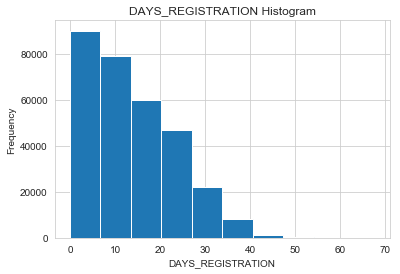

In [66]:
(application_data['DAYS_REGISTRATION'] / -365.25).plot.hist(title = 'DAYS_REGISTRATION Histogram');
plt.xlabel('DAYS_REGISTRATION')



#### The next variable we pick for our Univariate analysis is `DAYS_ID_PUBLISH`

In [4]:
# convert to positive years again
(application_data['DAYS_ID_PUBLISH'] / -365.25).describe()

count    307511.000000
mean          8.197679
std           4.132650
min          -0.000000
25%           4.709103
50%           8.908966
75%          11.770021
max          19.704312
Name: DAYS_ID_PUBLISH, dtype: float64

Text(0.5, 0, 'DAYS_ID_PUBLISH')

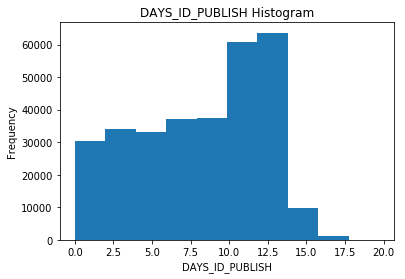

In [5]:
(application_data['DAYS_ID_PUBLISH'] / -365.25).plot.hist(title = 'DAYS_ID_PUBLISH Histogram');
plt.xlabel('DAYS_ID_PUBLISH')




#### Finally, let's review the correlation matrix for the additional variables examined so far:

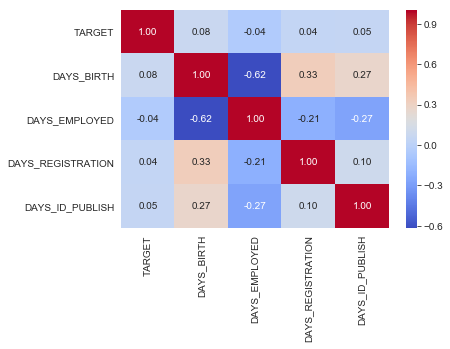

In [70]:
g = sns.heatmap(application_data[['TARGET','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")


#### `DAYS_BIRTH` appears to be the most correlated with TARGET so far. But as there are more numerical features in the dataset let's continue the univariate examination of each variable.


`OWN_CAR_AGE`

Text(0.5, 0, 'OWN_CAR_AGE')

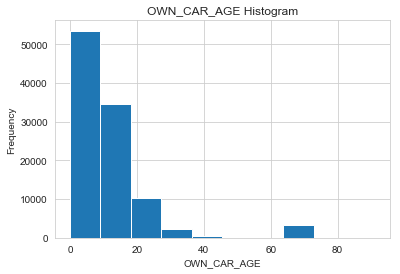

In [72]:
application_data['OWN_CAR_AGE'].plot.hist(title = 'OWN_CAR_AGE Histogram');
plt.xlabel('OWN_CAR_AGE')

`CNT_FAMILY_MEMBERS`

Text(0.5, 0, 'CNT_FAM_MEMBERS')

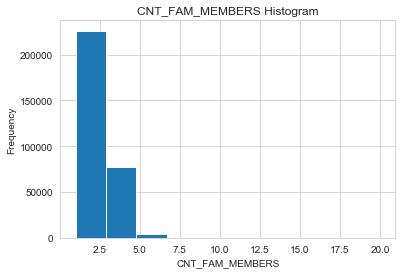

In [74]:
application_data['CNT_FAM_MEMBERS'].plot.hist(title = 'CNT_FAM_MEMBERS Histogram');
plt.xlabel('CNT_FAM_MEMBERS')

`REGION_RATING_CLIENT_W_CITY`

Text(0.5, 0, 'REGION_RATING_CLIENT_W_CITY')

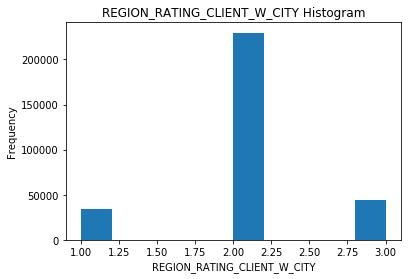

In [6]:

application_data['REGION_RATING_CLIENT_W_CITY'].plot.hist(title = 'REGION_RATING_CLIENT_W_CITY Histogram');
plt.xlabel('REGION_RATING_CLIENT_W_CITY')


`HOUR_APPR_PROCESS_START`


Text(0.5, 0, 'HOUR_APPR_PROCESS_START')

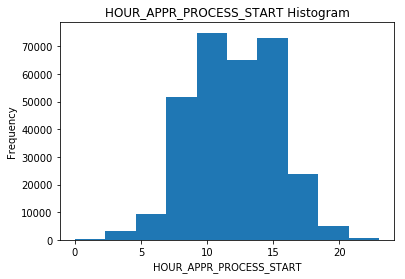

In [7]:
application_data['HOUR_APPR_PROCESS_START'].plot.hist(title = 'HOUR_APPR_PROCESS_START Histogram');
plt.xlabel('HOUR_APPR_PROCESS_START')



Let's review the correlation matrix for the additional variables examined so far:


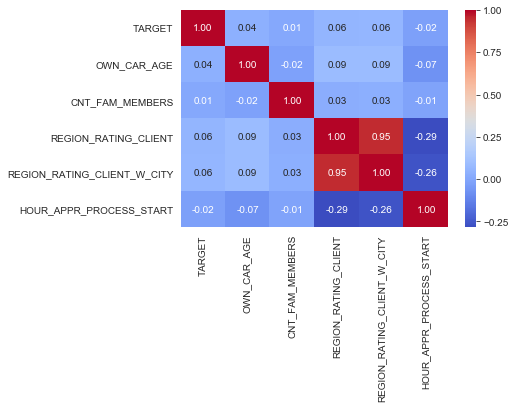

In [80]:
g = sns.heatmap(application_data[['TARGET','OWN_CAR_AGE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")



#### `REGION_RATING_CLIENT` and `REGION_RATING_CLIENT_W_CITY` are the most correlated with our TARGET, though these two variables are highly correlated with each other. We will probably want to include only one of these two.



`EXTERNAL SOURCE`


Text(0.5, 1.0, 'EXt Source 3 Distribution')

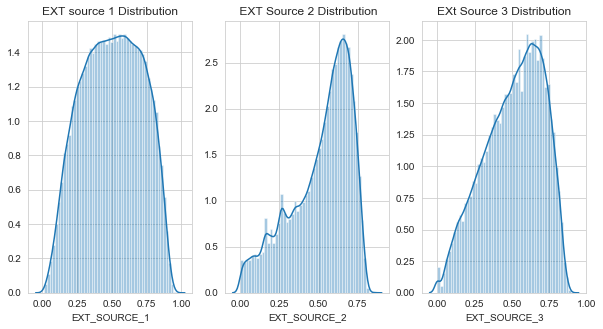

In [81]:
f, ax = plt.subplots(ncols=3,figsize=(10, 5))


sns.distplot(application_data.EXT_SOURCE_1.dropna(), kde=True,ax=ax[0]).set_title('EXT source 1 Distribution')



sns.distplot(application_data.EXT_SOURCE_2.dropna(), kde=True,ax=ax[1]).set_title(' EXT Source 2 Distribution')

 
sns.distplot(application_data.EXT_SOURCE_3.dropna(), kde=True, ax=ax[2]).set_title('EXt Source 3 Distribution')


#### These three external sources variables appear similar but have different distributions. 
Let's look at their correlations with each other and with our `TARGET`.


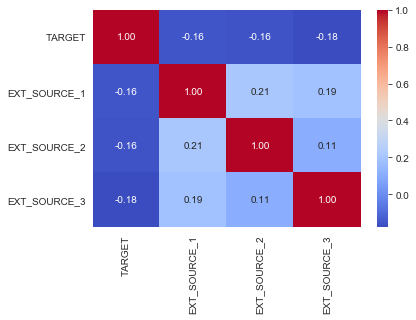

In [83]:
g = sns.heatmap(application_data[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

#### These three are all strongly correlated with our `TARGET`, and they are not too highly correlated with each other.  These look like important variables for later analysis.


`OBS_60_CNT_SOCIAL_CIRCLE`


Text(0.5, 0, 'OBS_60_CNT_SOCIAL_CIRCLE')

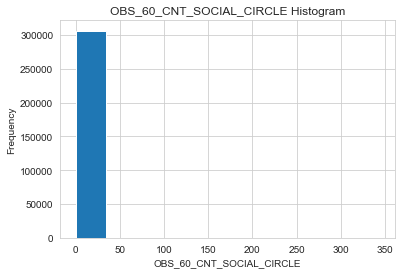

In [96]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].plot.hist(title = 'OBS_60_CNT_SOCIAL_CIRCLE Histogram');
plt.xlabel('OBS_60_CNT_SOCIAL_CIRCLE')



#### `DEF_60_CNT_SOCIAL_CIRCLE`
    

Text(0.5, 0, 'DEF_60_CNT_SOCIAL_CIRCLE')

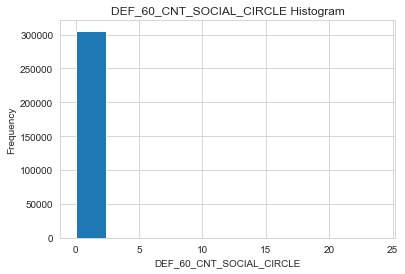

In [97]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].plot.hist(title = 'DEF_60_CNT_SOCIAL_CIRCLE Histogram');
plt.xlabel('DEF_60_CNT_SOCIAL_CIRCLE')

#### `OBS_60_CNT_SOCIAL_CIRCLE`

Text(0.5, 0, 'OBS_60_CNT_SOCIAL_CIRCLE')

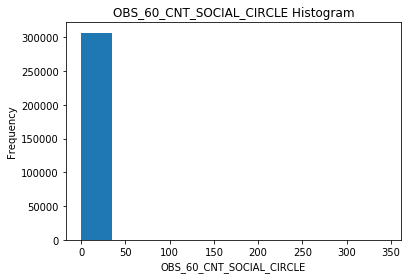

In [8]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].plot.hist(title = 'OBS_60_CNT_SOCIAL_CIRCLE Histogram');
plt.xlabel('OBS_60_CNT_SOCIAL_CIRCLE')


#### `DEF_30_CNT_SOCIAL_CIRCLE`

Text(0.5, 0, 'DEF_30_CNT_SOCIAL_CIRCLE')

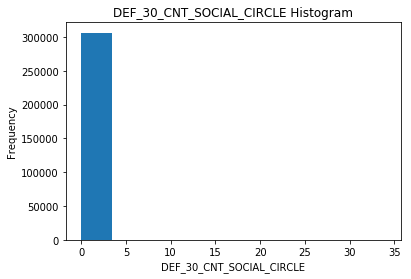

In [9]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].plot.hist(title = 'DEF_30_CNT_SOCIAL_CIRCLE Histogram');
plt.xlabel('DEF_30_CNT_SOCIAL_CIRCLE')



#### Now let's try to find a correlation between the variables discussed above.

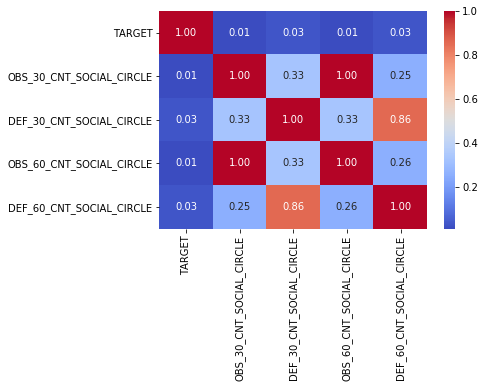

In [10]:
g = sns.heatmap(application_data[['TARGET','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")


#### Thus, we can infer that the `DEF` counts are highly correlated with each other, but none of these are very correlated with our `TARGET`.

Text(0.5, 0, 'DAYS_LAST_PHONE_CHANGE')

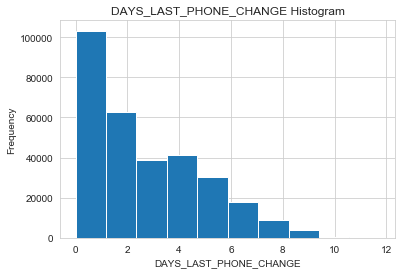

In [100]:
(application_data['DAYS_LAST_PHONE_CHANGE'] / -365.25).plot.hist(title = 'DAYS_LAST_PHONE_CHANGE Histogram');
plt.xlabel('DAYS_LAST_PHONE_CHANGE')

Correlation of :

-`TARGET` 

-`DAYS_LAST_PHONE_CHANGE`

-`AMT_REQ_CREDIT_BUREAU_HOUR`

-`AMT_REQ_CREDIT_BUREAU_DAY`

-`AMT_REQ_CREDIT_BUREAU_WEEK`

-`AMT_REQ_CREDIT_BUREAU_MON`

-`AMT_REQ_CREDIT_BUREAU_QRT`

-`AMT_REQ_CREDIT_BUREAU_YEAR`



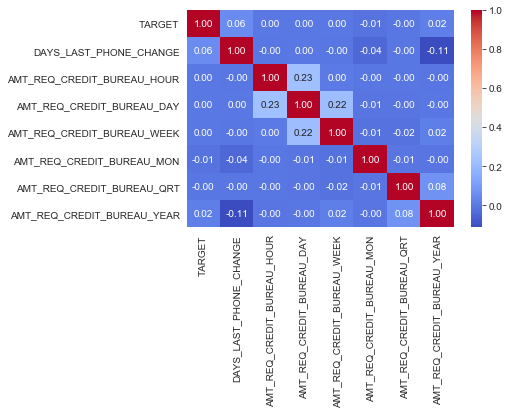

In [102]:
g = sns.heatmap(application_data[['TARGET','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

#### Next we analyze some miscellanous Columns related to the features of the apartment which might be useful.

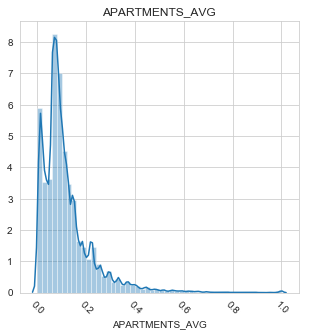

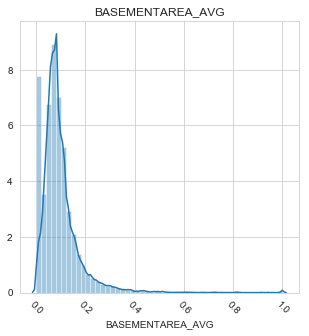

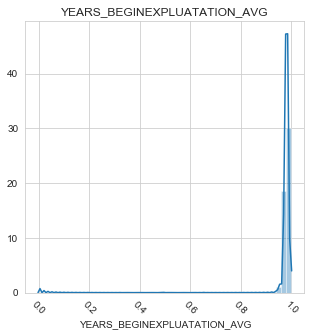

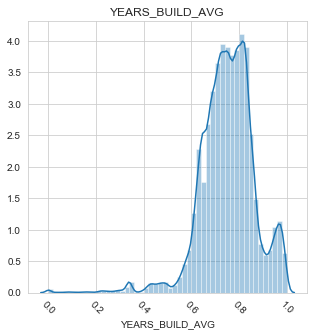

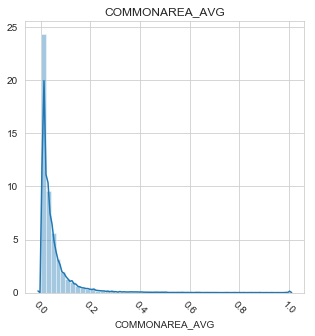

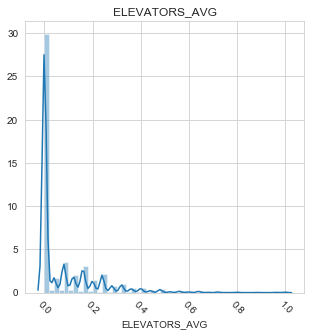

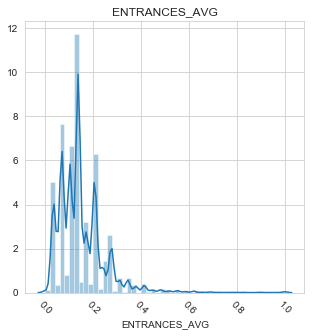

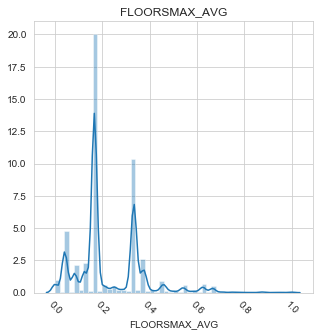

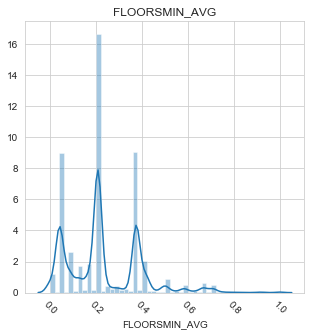

In [113]:
val_p=['APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG']
for i in val_p:
    plt.figure(figsize = (5,5))
    sns.distplot(application_data[i].dropna(), kde=True)        
    plt.title(i)
    plt.xticks(rotation=-45)
    plt.show()

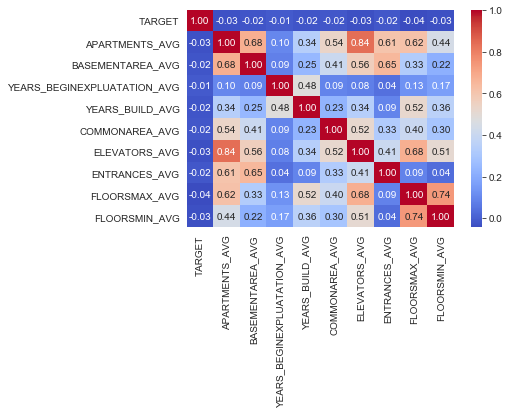

In [114]:
g = sns.heatmap(application_data[['TARGET','APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

#### `DAYS_LAST_PHONE_CHANGE` is more correlated with our `TARGET`, while the credit bureau variables don't seem to be correlated with `TARGET` much at all.


# DERIVED METRICES


Now that we have reviewed the initial data provided, there are a few more variables we can create from the existing data.

New variables to try:
`EMPLOY_AGE` = `DAYS_EMPLOYED / DAYS_BIRTH`: how long was the applicant employed relative to how old the applicant was - employed for a larger portion may indicate reliability

`INCOME_AGE` = `AMT_INCOME_TOTAL / DAYS_BIRTH`: how large is the income relative to how old the applicant was - may indicate potential for income to rise and may repayment easier in the future

`CREDIT_AGE` = `AMT_CREDIT / DAYS_BIRTH`: how much credit relative to how old the applicant was - may indicate sources of other financial stress

`CREDIT_INCOME` = `AMT_CREDIT / AMT_INCOME_TOTAL`: how much credit relative to total income - too much credit may be too risky

`ANNUITY_INCOME` = `AMT_ANNUITY / AMT_INCOME_TOTAL`: how large are the loan payments relative to total income - too large of payments may not be sustainable

`ANNUITY_CREDIT` = `AMT_ANNUITY / AMT_CREDIT`: how large are the loan payments relative to the credit amount (how long will it take to pay it back, without accounting for different interest rates)


In [107]:
# create new variables
application_data['EMPLOY_AGE'] = application_data['DAYS_EMPLOYED'] / application_data['DAYS_BIRTH']
application_data['INCOME_AGE'] = application_data['AMT_INCOME_TOTAL'] / application_data['DAYS_BIRTH']
application_data['CREDIT_AGE'] = application_data['AMT_CREDIT'] / application_data['DAYS_BIRTH']
application_data['CREDIT_INCOME'] = application_data['AMT_CREDIT'] / application_data['AMT_INCOME_TOTAL']
application_data['ANNUITY_INCOME'] = application_data['AMT_ANNUITY'] / application_data['AMT_INCOME_TOTAL']
application_data['ANNUITY_CREDIT'] = application_data['AMT_ANNUITY'] / application_data['AMT_CREDIT']



#### Let's look at the correlations of the new variables we created along with `TARGET`


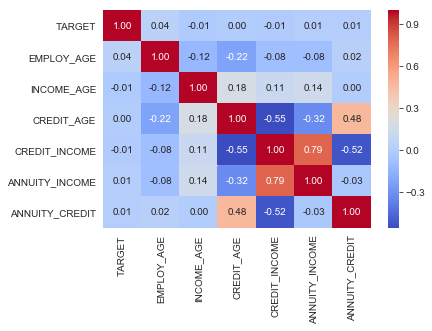

In [109]:
g = sns.heatmap(application_data[['TARGET','EMPLOY_AGE','INCOME_AGE','CREDIT_AGE','CREDIT_INCOME','ANNUITY_INCOME','ANNUITY_CREDIT']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")



#### `EMPLOY_AGE` seems to be most correlated with `TARGET` of our new variables and so 
we can plot `EMPLOY_AGE` relative to `TARGET` using `KDE`


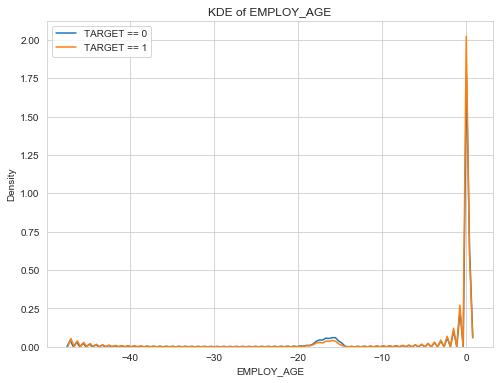

In [112]:

plt.figure(figsize = (8, 6))
sns.kdeplot(application_data.loc[application_data['TARGET'] == 0, 'EMPLOY_AGE'], label = 'TARGET == 0')
sns.kdeplot(application_data.loc[application_data['TARGET'] == 1, 'EMPLOY_AGE'], label = 'TARGET == 1')
plt.xlabel('EMPLOY_AGE'); plt.ylabel('Density'); plt.title('KDE of EMPLOY_AGE');


# Bivariate Analysis


Now let us proceed with a correlation oriented Bivariate analysis and try to see whether the `TARGET` variable is affected by any of the `numerical features` in the `application_data.csv`



In [10]:
def plot_re(df,t1='',t2=''):
    f,ax=plt.subplots(1,2,figsize=(10,6))
    df[[t1,t2]].groupby([t1]).count().plot.bar(ax=ax[0],color='Green')
    ax[0].set_title('count of customer Based on'+t1)
    sns.countplot(t1,hue=t2,data=df,ax=ax[1],palette="spring")
    ax[1].set_title(t1+': Repayer vs Defualter')
    # Rotate x-labels
    plt.xticks(rotation=-90)
    a=plt.show()
    return a



#### `NAME_EDUCATION_TYPE` Using this variable and the `TARGET` variable we can see that the applicants with `Secondary/secondary special` education level are not able to pay the loan




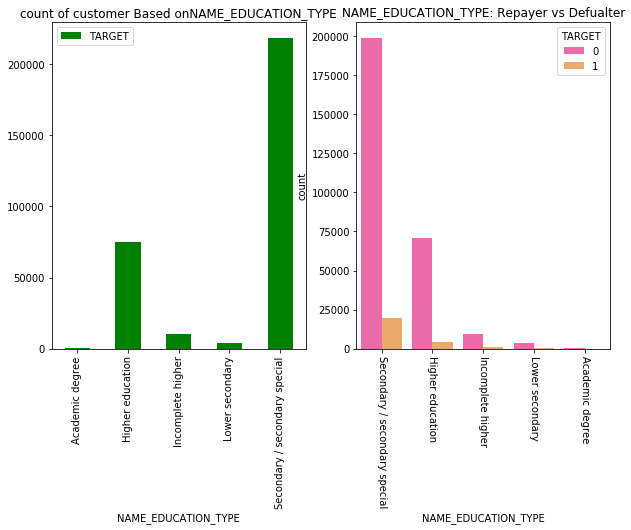

In [37]:
plot_re(application_data,'NAME_EDUCATION_TYPE','TARGET')


#### `CODE_GENDER` Next, we see how the applicant's gender is correlated with the tendency to `repay` or to `default`. From the plots we see that `Females` have high count and not able to pay the loan back

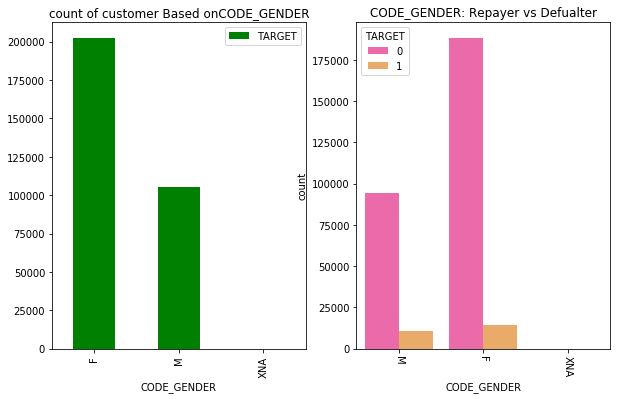

In [11]:
plot_re(application_data,'CODE_GENDER','TARGET')


Analysis based on `income type` reveals that working class has a high occurrence in the dataset and not able to repay the loan as compared to others.


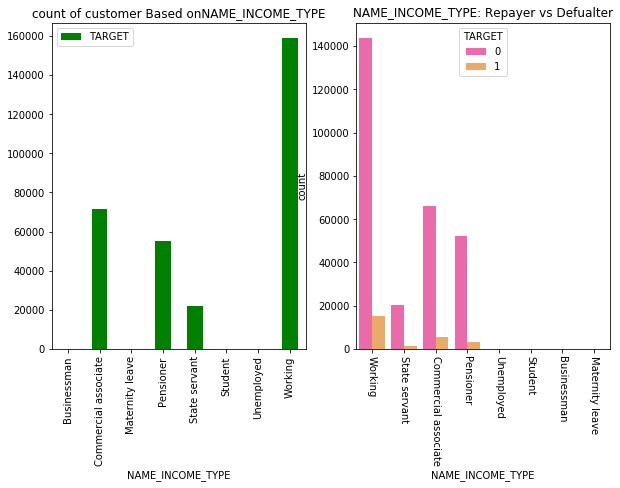

In [39]:
plot_re(application_data,'NAME_INCOME_TYPE','TARGET')



#### Based on the `OCCUPATION_TYPE` Laborers are high in number as the application who are more likely to default.


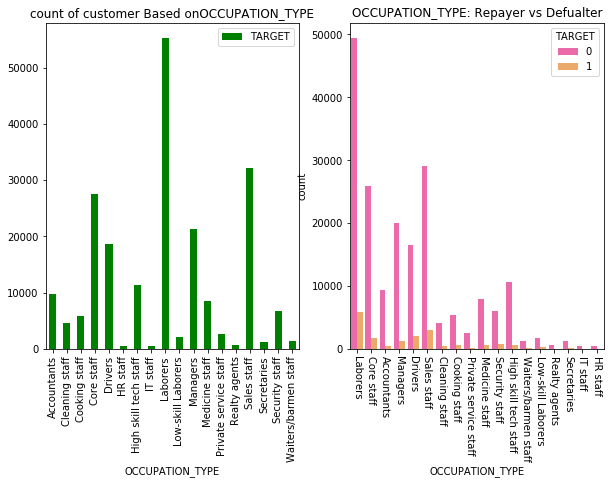

In [40]:
plot_re(application_data,'OCCUPATION_TYPE','TARGET')


#### Another factor is `Married` people are less likely to able to `repay` the loans


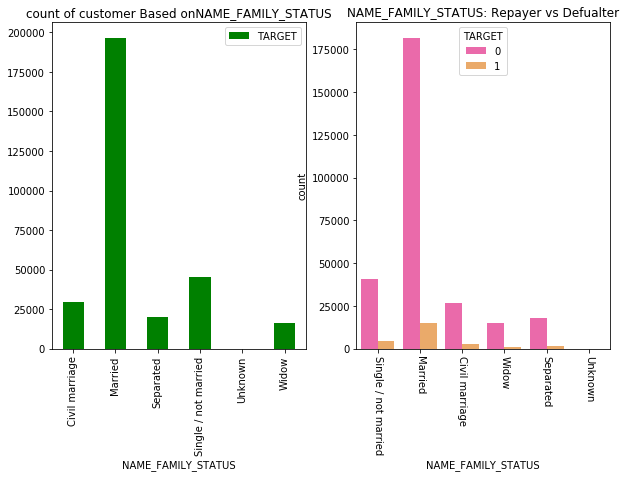

In [41]:
plot_re(application_data,'NAME_FAMILY_STATUS','TARGET')


#### Based on the `HOUSING_TYPE` the people residing in `House/Apartments` have high count in the defaulters.


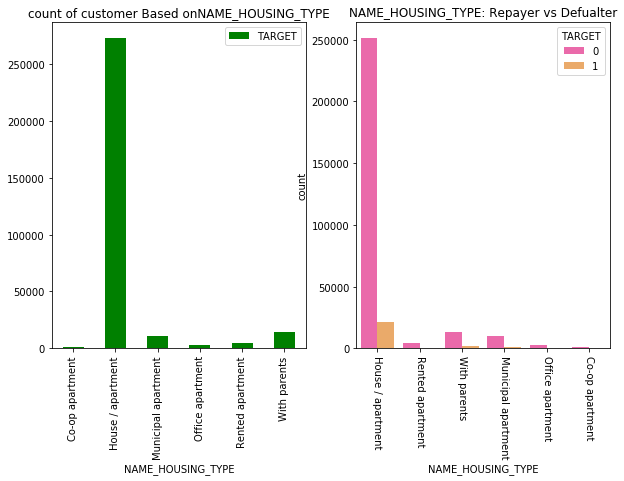

In [42]:
plot_re(application_data,'NAME_HOUSING_TYPE','TARGET')


#### `Unaccompanied customer` are very much likely to be defaulter


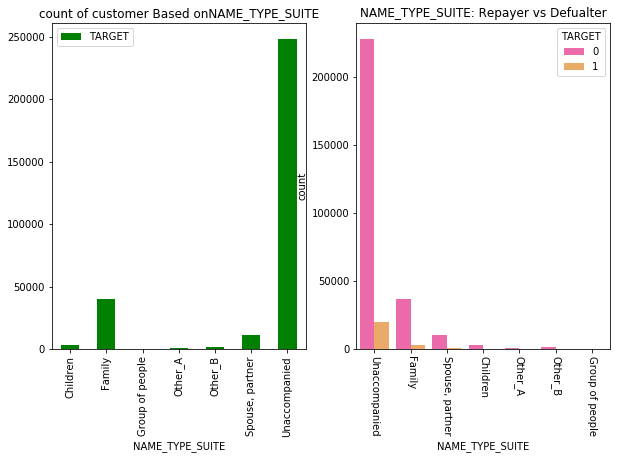

In [43]:
plot_re(application_data,'NAME_TYPE_SUITE','TARGET')


#### `ORGANIZATION_TYPE` Business type 3 is the defaulter


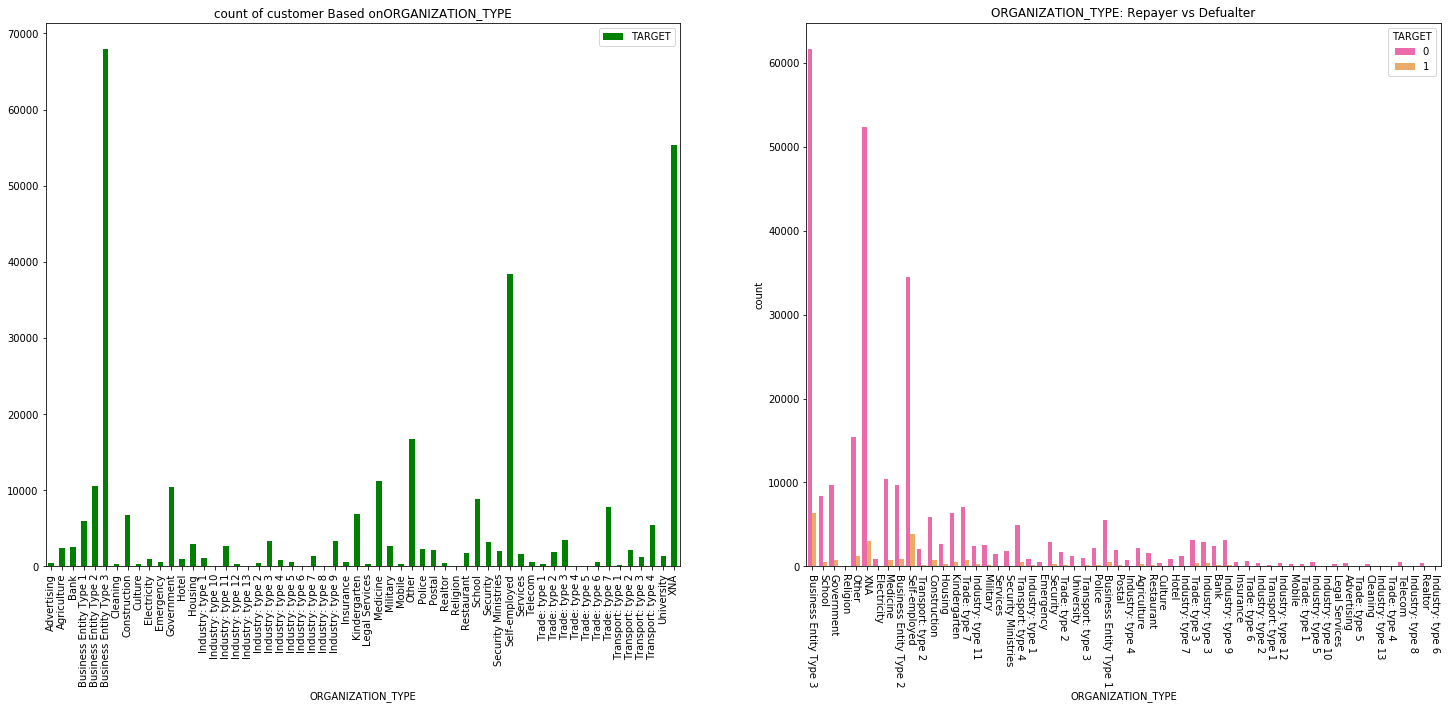

In [21]:
f,ax=plt.subplots(1,2,figsize=(25,10))
df=application_data
df[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE']).count().plot.bar(ax=ax[0],color='Green')
ax[0].set_title('count of customer Based on'+ 'ORGANIZATION_TYPE')
sns.countplot('ORGANIZATION_TYPE',hue='TARGET',data=df,ax=ax[1],palette="spring")
ax[1].set_title('ORGANIZATION_TYPE'+': Repayer vs Defualter')
# Rotate x-labels
plt.xticks(rotation=-90)
plt.show()
    

#### `FLAG_OWN_CAR`

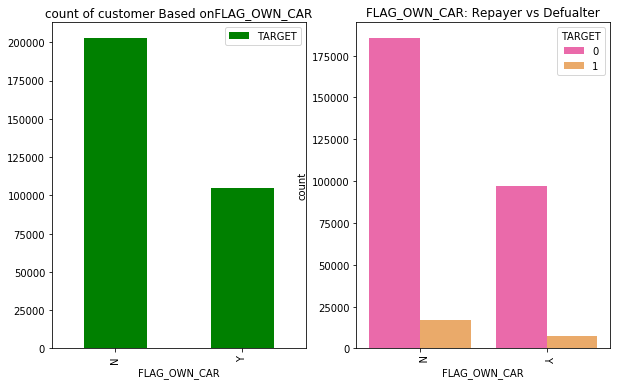

In [44]:
plot_re(application_data,'FLAG_OWN_CAR','TARGET')


#### `FLAG_OWN_REALTY`

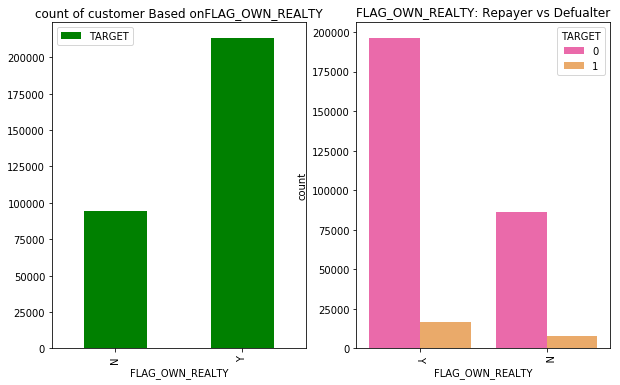

In [45]:
plot_re(application_data,'FLAG_OWN_REALTY','TARGET')



#### `NAME_CONTRACT_TYPE`

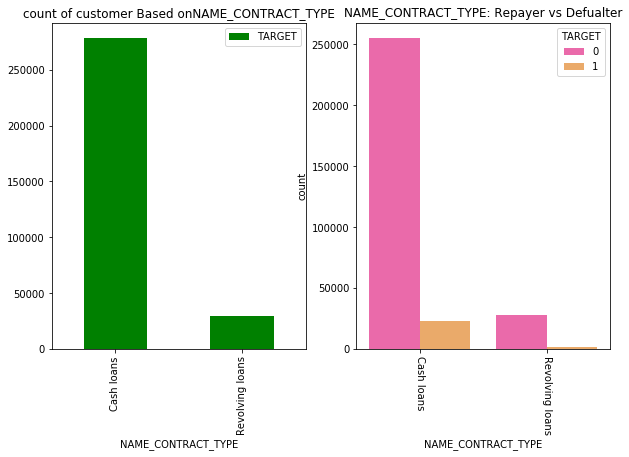

In [46]:
plot_re(application_data,'NAME_CONTRACT_TYPE','TARGET')



#### `WEEKDAY_APPR_PROCESS_START`


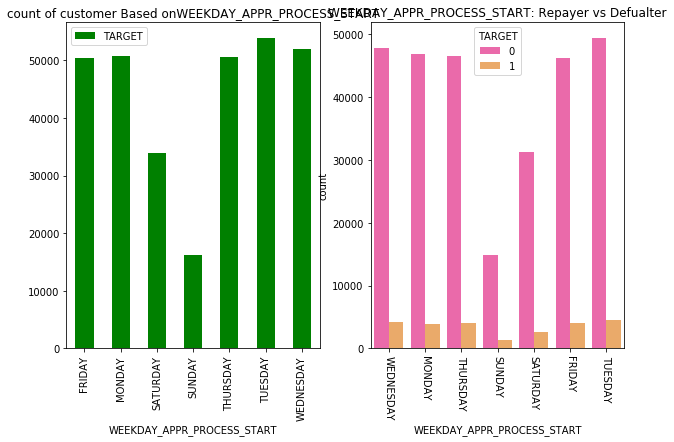

In [23]:
plot_re(application_data,'WEEKDAY_APPR_PROCESS_START','TARGET')


#### `HOUSETYPE_MODE` Customers on blocks of flat are more likely to be defaulter

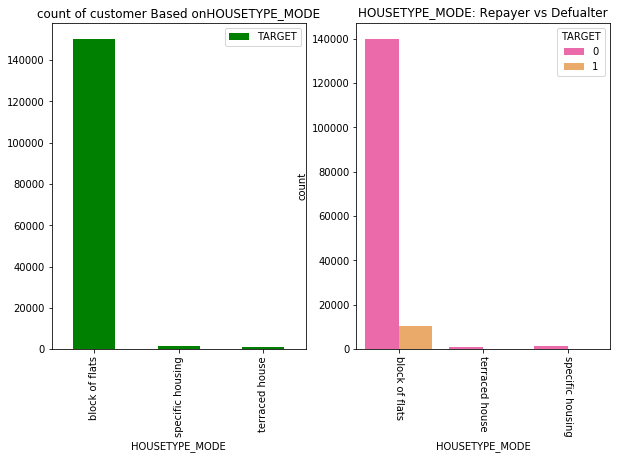

In [48]:
plot_re(application_data,'HOUSETYPE_MODE','TARGET')

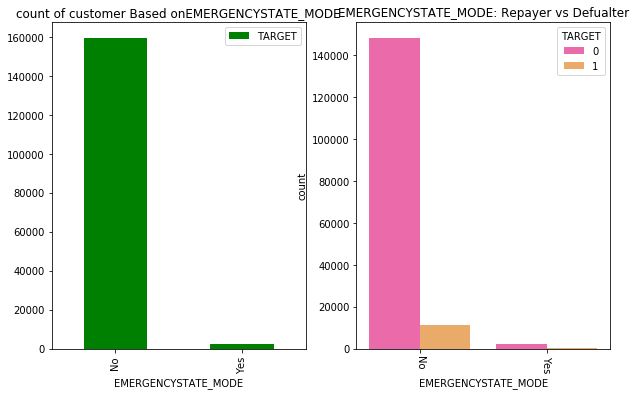

In [49]:
plot_re(application_data,'EMERGENCYSTATE_MODE','TARGET')

#### `CHILDREN_COUNT`


Text(0.5, 1.0, 'Children count Distribution - Repayer V.S. Non Repayers')

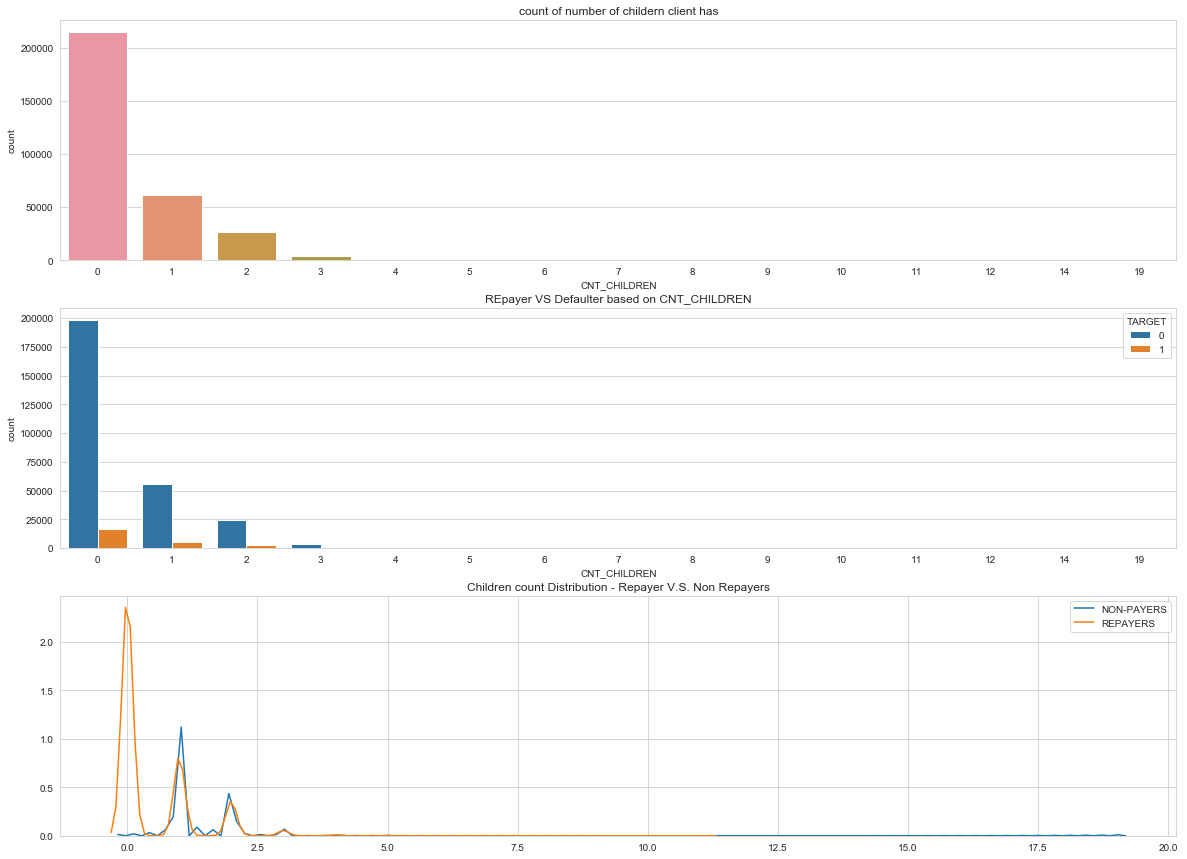

In [52]:
sns.set_style('whitegrid')
f, ax = plt.subplots(3,1,figsize=(20,15))

sns.countplot(x='CNT_CHILDREN', data=application_data, ax=ax[0]).set_title('count of number of childern client has');

sns.countplot("CNT_CHILDREN", hue='TARGET', 
              data=application_data,ax=ax[1]).set_title('REpayer VS Defaulter based on CNT_CHILDREN')

ax[2]=sns.kdeplot(application_data.loc[(application_data['TARGET'] == 0),'CNT_CHILDREN'] ,label='NON-PAYERS')
ax[2]=sns.kdeplot(application_data.loc[(application_data['TARGET'] == 1),'CNT_CHILDREN'],label='REPAYERS')
ax[2].set_title('Children count Distribution - Repayer V.S. Non Repayers')


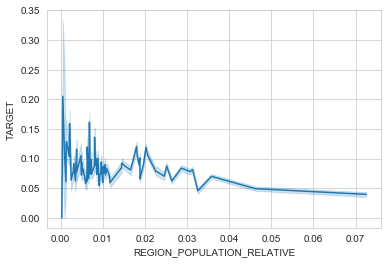

In [57]:
g = sns.lineplot(x='REGION_POPULATION_RELATIVE', y='TARGET', data=application_data, palette = "muted")


#### Based on region and city of work and residence




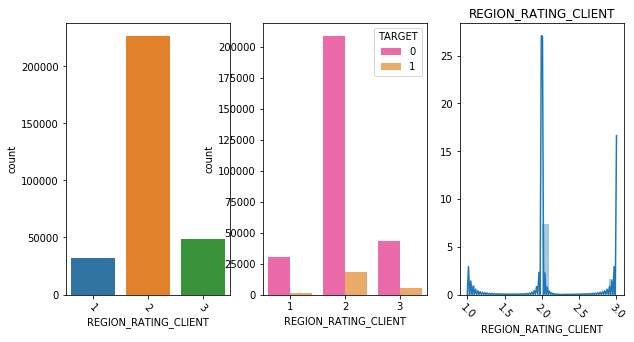

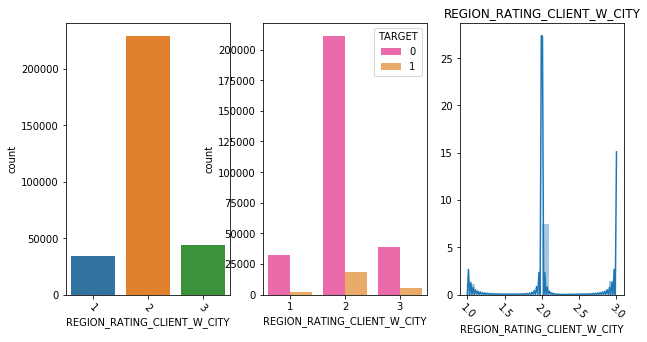

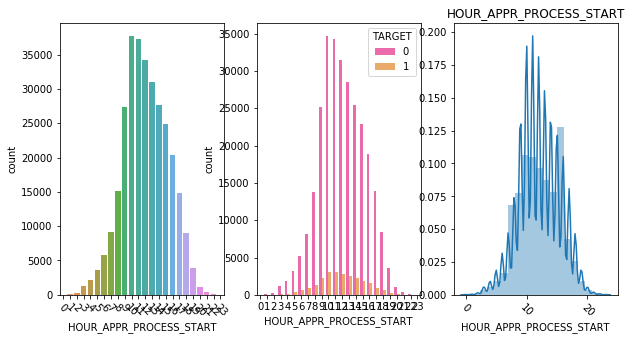

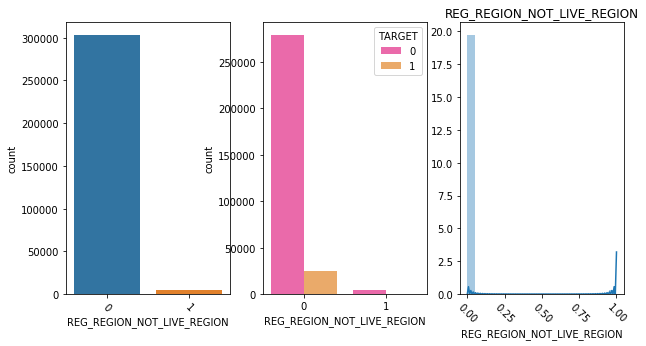

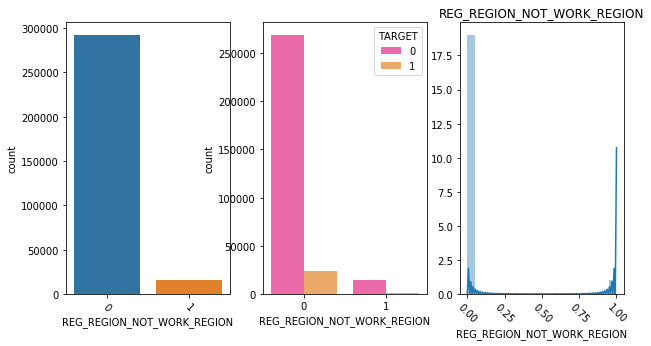

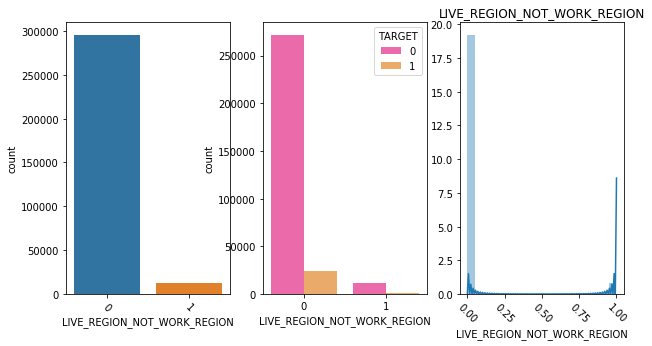

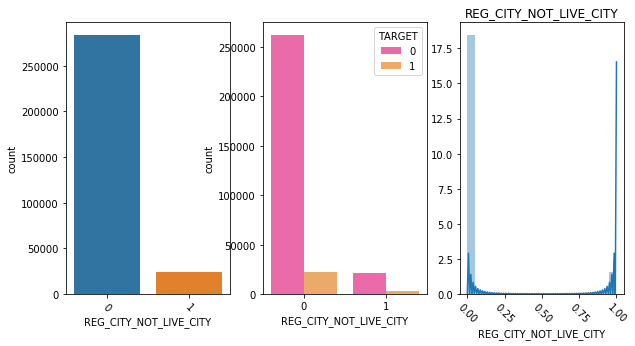

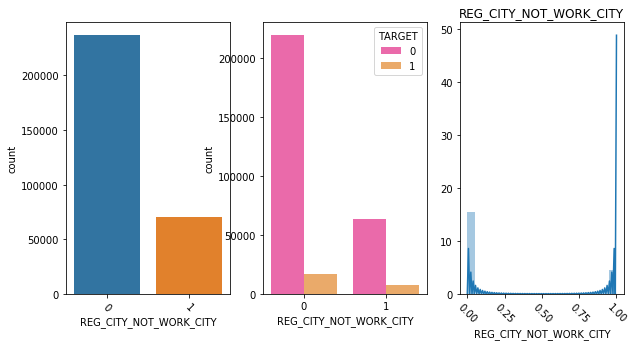

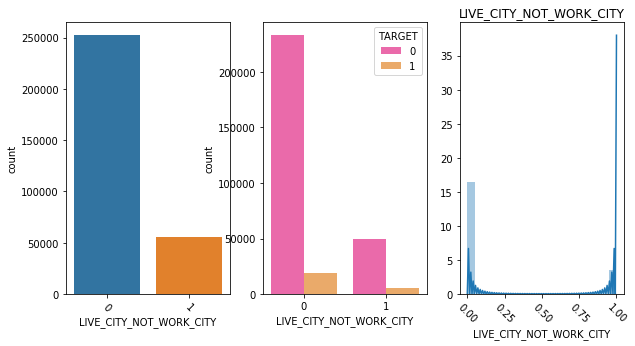

In [24]:
visual_dat= ['REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']


for i in visual_dat:
    plt.figure(figsize = (10,5))
    plt.subplot(1,3,1)
    plt.xticks(rotation=-45)
    sns.countplot(application_data[i])
    plt.subplot(1,3,2)
    sns.countplot(application_data[i],hue=application_data['TARGET'],palette="spring")
    plt.subplot(1,3,3)
    sns.distplot(application_data[i],bins= 20) 
    plt.title(i)
    plt.xticks(rotation=-45)
    plt.show()